## Creat Sieve Data and Create DataFrame

In [30]:
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "opening": [4.75, 2.00, 0.850, 0.425, 0.250, 0.150, 0.075, 0],
    "mass_retained": [0, 17.6, 56.3, 108.2, 91.9, 94.1, 57.6, 25.0]
}

df = DataFrame(data)


## Calculate Percent Finer

In [28]:
def calculate_percent_finer(df):
    total_mass = df.mass_retained.sum()
    arr = []
    for count, sieve in enumerate(df.opening.values):
        cumulative_mass = sum([df.mass_retained.values[i] for i in range(count + 1)])
        percent_finer = ((total_mass - cumulative_mass) / total_mass) * 100
        arr.append(percent_finer)
    return df.assign(p_finer = arr)

print(calculate_percent_finer(df))

   opening  mass_retained     p_finer
0    4.750            0.0  100.000000
1    2.000           17.6   96.094963
2    0.850           56.3   83.603284
3    0.425          108.2   59.596184
4    0.250           91.9   39.205680
5    0.150           94.1   18.327047
6    0.075           57.6    5.546927
7    0.000           25.0    0.000000


## Plot Semilog Grain Size Distribution Curve

Text(0, 0.5, 'Percent Passing')

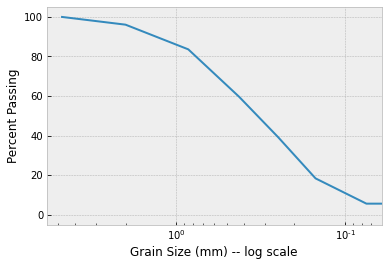

In [36]:
%matplotlib inline
df2 = calculate_percent_finer(df)
plt.style.use("bmh")
plt.semilogx(df2.opening, df2.p_finer)
plt.gca().invert_xaxis()
plt.xlabel("Grain Size (mm) -- log scale")
plt.ylabel("Percent Passing")